# Regresión con variables transformadas

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

%matplotlib inline

## Windmill Power

In [2]:
df = pd.read_excel('table 11-5.xlsx')
df.head()

,Observation Number,Wind Volocity,DC Output
0,1,5.0,1.582
1,2,6.0,1.822
2,3,3.4,1.057
3,4,2.7,0.500
4,5,10.0,2.236


In [3]:
df.columns = ['Obs', 'WindVel', 'DC']
df.head()

,Obs,WindVel,DC
0,1,5.0,1.582
1,2,6.0,1.822
2,3,3.4,1.057
3,4,2.7,0.500
4,5,10.0,2.236


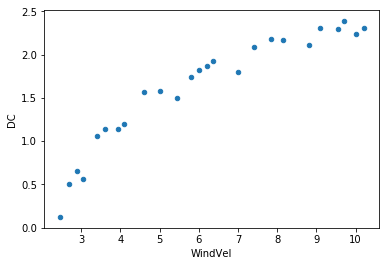

In [4]:
df.plot.scatter('WindVel', 'DC')

In [5]:
modelo = smf.ols('DC ~ WindVel', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DC   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     160.3
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           7.55e-12
Time:                        13:29:09   Log-Likelihood:                 1.6614
No. Observations:                  25   AIC:                            0.6772
Df Residuals:                      23   BIC:                             3.115
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1309      0.126      1.039      0.310      -0.130       0.392
WindVel        0.2411      0.019     12.659      0.000       0.202       0.281
==============================================================================
Omnibus:                        2.989   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.200
Skew:                          -0.725   Prob(JB):                        0.333
Kurtosis:                       2.906   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

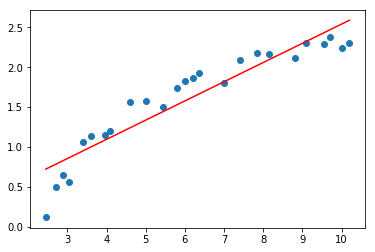

In [6]:
# Obtener valores a graficar
x_val = np.linspace(df['WindVel'].min(), df['WindVel'].max(), 100)
predi = resultado.get_prediction({'WindVel': x_val})

# Graficar
plt.scatter(df['WindVel'], df['DC'])
plt.plot(x_val,predi.predicted_mean, color='red')

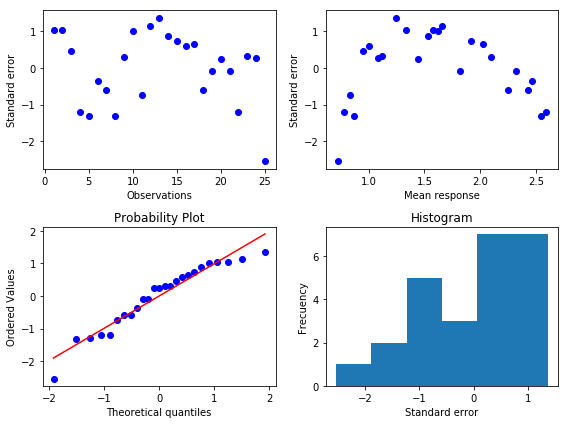

In [7]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df['Obs'], resultado.resid_pearson, color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(resultado.resid_pearson, bins=6)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

In [8]:
df['WindVelLog'] = np.log(df['WindVel'])
df.head()

,Obs,WindVel,DC,WindVelLog
0,1,5.0,1.582,1.609438
1,2,6.0,1.822,1.791759
2,3,3.4,1.057,1.223775
3,4,2.7,0.500,0.993252
4,5,10.0,2.236,2.302585


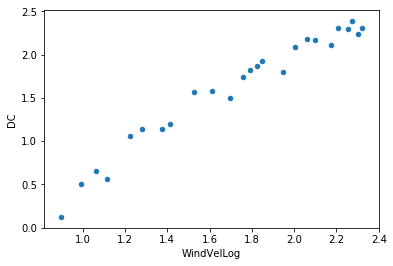

In [9]:
df.plot.scatter('WindVelLog', 'DC')

In [10]:
modelo = smf.ols('DC ~ WindVelLog', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DC   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     516.6
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           2.93e-17
Time:                        13:29:10   Log-Likelihood:                 15.160
No. Observations:                  25   AIC:                            -26.32
Df Residuals:                      23   BIC:                            -23.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8304      0.111     -7.493      0.000      -1.060      -0.601
WindVelLog     1.4168      0.062     22.728      0.000       1.288       1.546
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   1.150
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.107
Skew:                          -0.457   Prob(JB):                        0.575
Kurtosis:                       2.523   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

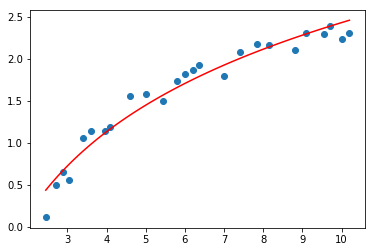

In [11]:
# Obtener valores a graficar
predi = resultado.get_prediction({'WindVelLog': np.log(x_val)})

# Graficar
plt.scatter(df['WindVel'], df['DC'])
plt.plot(x_val, predi.predicted_mean, color='red')

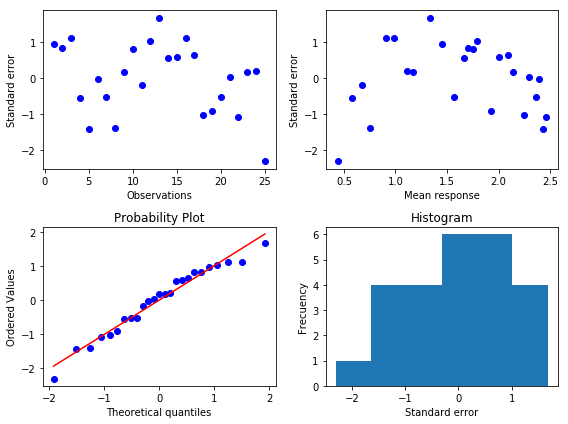

In [12]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df['Obs'], resultado.resid_pearson, color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(resultado.resid_pearson, bins=6)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

In [13]:
df['WindVelInv'] = 1 / df['WindVel']
df.head()

,Obs,WindVel,DC,WindVelLog,WindVelInv
0,1,5.0,1.582,1.609438,0.200000
1,2,6.0,1.822,1.791759,0.166667
2,3,3.4,1.057,1.223775,0.294118
3,4,2.7,0.500,0.993252,0.370370
4,5,10.0,2.236,2.302585,0.100000


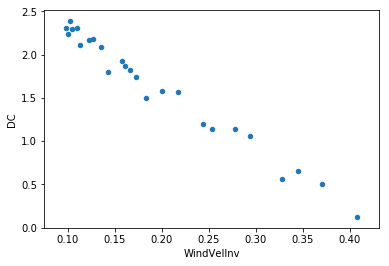

In [14]:
df.plot.scatter('WindVelInv', 'DC')

In [15]:
modelo = smf.ols('DC ~ WindVelInv', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DC   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1128.
Date:                Tue, 07 Nov 2017   Prob (F-statistic):           4.74e-21
Time:                        13:29:11   Log-Likelihood:                 24.635
No. Observations:                  25   AIC:                            -45.27
Df Residuals:                      23   BIC:                            -42.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9789      0.045     66.341      0.000       2.886       3.072
WindVelInv    -6.9345      0.206    -33.592      0.000      -7.362      -6.508
==============================================================================
Omnibus:                        2.768   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.287
Skew:                          -0.720   Prob(JB):                        0.319
Kurtosis:                       2.646   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
alpha = resultado.params['Intercept']
beta = resultado.params['WindVelInv']
y_gorro = lambda x: alpha + beta * (1/x)

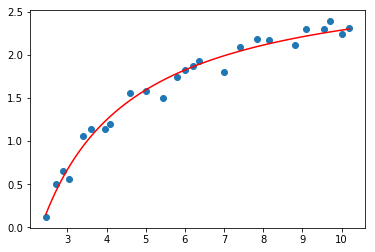

In [17]:
plt.scatter(df['WindVel'], df['DC'])
plt.plot(x_val, y_gorro(x_val), color='red')

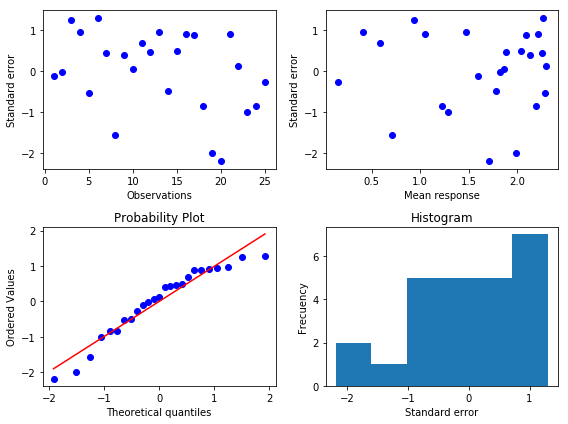

In [18]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df['Obs'], resultado.resid_pearson, color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(resultado.resid_pearson, bins=6)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()